# MATH3024 Project: Lockdown Disease Model
Ashkaan Gaurav Singh (23352583)

October 18th 2024

This project was produced using an [Anaconda](https://www.anaconda.com/) kernel running ```Python 3.12.4```



## 1. Introduction

### 1.1 Background
The COVID-19 pandemic brought unprecedented changes to societies worldwide, with lockdowns becoming a central method for controlling the spread of the virus. These enforced restrictions aimed to limit social interaction, reduce transmission rates, and protect public health. However, prolonged lockdowns also led to significant psychological impacts on individuals, often resulting in anxiety, depression, stress [1], and even defiance of the measures designed to ensure public safety.

During lockdowns, individuals were required to drastically limit their movement, often confined to their homes for extended periods. These isolation and quarantine measures had profound effects on mental well-being, contributing to increased feelings of frustration, boredom, and a sense of being trapped. The lack of social interaction and the disruption of normal routines only exacerbated these feelings, leading many to experience psychological distress. These emotional responses, in turn, fueled rebelious behavior, where individuals, out of frustration and agitation, defied lockdown rules and sought social interaction despite the risk of infection. I will aim to model this emotional response as an agitation due to its relationship with anixety and depression [2]. 

The lyric, “Despite all my rage, I am still just a rat in a cage,” encapsulates the frustration and sense of confinement experienced by individuals ("rats") during quarantine and lockdown ("cage") restrictions. Within my model, the “rage” symbolizes the agitation that arises as a direct consequence of these restrictions, highlighting the emotional and psychological challenges faced by people in times of enforced isolation.

My model seeks to provide valuable simulations and comprehensive statistics to predict the worst-case value of infected proportions after a year of living with a specific disease. By employing advanced modeling techniques, the goal is to create a framework that not only illustrates the potential trajectories of infection rates but also offers insights into how these patterns can influence public health outcomes and individual behaviours. An important aspect of this model is to provide a platform to make decisions regarding the enforcement of lockdowns. This is particularly relevant in the context of public sentiment, as some members of the Australian population have expressed strong opposition to quarantine measures, even taking to the streets to voice their opinions amidst a lockdown [8]. In contrast, a study conducted in Germany revealed that while the majority of the population complied with lockdown measures, many respondents were resistant to long-lasting restrictions [9]. Maintaining public happiness and trust is crucial for governments to prevent discontent citizens and minimize rebellious activities. If citizens feel that their needs and concerns are being ignored, they may view authorities as adversaries rather than allies in public health. Therefore, my model aims to balance the need for effective disease control with the imperative of preserving societal well-being. By providing data-driven insights, it can help policymakers navigate the complex landscape of public health and social stability, ultimately fostering cooperation and adherence among the population.

Many Agent-Based Models (ABM) for disease simulations utilise the SIR (Susceptible-Infected-Removed) model, including rates of infection and rates of recovery [4]. For simplicity, all agents in my model have homogeneous rates of recovery where it takes some amount of time steps (days) to be classified as recovered [3]. Further, the rate of infection is homogeneous as it relates to a specific disease’s strength. This relates an agent’s probability of infection to be the rate of infection multiplied by the probability of coming into close contact with an already infected agent.

Other models move around and interact with others within some radius [3, 10]. I have decided to design a disease model with limited movement to be representative of the lockdown situations during Covid-19. All agents in the model are homogeneous except for their current states. Other disease-related analysis have discussed the changes in transmission based on age [5]. I have decided not to implement this to focus more on a model that is based on purely an agents decisions and more generalised. Further models have been molded to capture lockdown social distancing measures such as school closure, workplace attendance and contact reduction [6]. The model driving my project utilises the concept of contact reduction by giving agents the ability to only visit the shops and host barbecues with their neighbours. School closure and workplace attendance were not added as to maintain homogeneous agents. 

All states in Australia generally close all non-essential businesses. Restraunts were allowed to stay open providing they were making takeaway orders as food is a necessity to all, as a result, grocery stores like Woolworths and Coles were as well [7]. This context driving the model is the reason for defining the agents main source of interactions as "visiting the shops". In February 2023, a survey performed on the Australian population showed that 53% of them shopped once a week [9]. Further, 88% of people in the survery shop every day and once a week [9]. Backed by these statistics, after an agent visits the shops, the amount of days before they visit the shops again is randomly drawn from a uniform distribution between 1 and 7, where 1 implies visiting the shop the day after already visiting and 7 implies waiting a week till their next grocery trip.
 

### 1.2 Model 

*Aside: Words written in all caps are global parameters within the model.*

The model is an ABM in a grid space where an individual agent occupies a 1 × 1 grid location as their “home”. In an N × N grid, the center row and center column are greyed out, indicating that no agents exist in these cells. This exclusion removes a total of $2N - 1$ cells (the center row and column minus the overlapping center cell), leaving $ N^2 - (2N - 1) = (N - 1)^2$ agents in the grid. For design purposes, the centre cell is defined as the shopping centre. 

The shopping centre creates forced interactions between agents. As each day progresses the amount of days before an agent goes to the shop decrements by 1. When this attribute for an Agent hits 0, then they **must** go to the shops and risk being infected. The agent simply jumps from their home to the shopping centre. However, in a more realistic perspective this jumping action is better described as a person leaving their home, getting in the car and drving back and forth. The implementation is structured to simulate the lockdown scenario of limited movement except for necessary movement such as grocery shopping. Moreover, if an agent hosts a barbecue, then all of its Von Neumann (NESW) neighbours surrounding it **must** also join. This then implies that an agent **must** join a barbecue if any of its Von Neumann neighbours host one. Therefore, at an agent's hosted barbecue, there'll always be at most 5 agents if it is surrounded by the grid, 4 agents if it is on the edge and 3 agents if it is on the corners.

The model investigates the affect of these interactions on the global infected proportion across one simulated year (or 365 days). 

#### 1.2.1 Initisalisation <img src="images/grid example.png" align="right" style="max-width: 30%; height: auto;"/>

The grid is 25 x 25 and is initialised with an agent in each cell ($(25-1)^2 = 576$ agents). During this, agents are initially infected with probability = ```INITIAL_PROBABILITY_INFECTED``` (i.e. the initial proportion of infected agents is $ \approx $ ```INITIAL_PROBABILITY_INFECTED```) and Agent.days_to_recover is a randomly assigned value between 1 and ```DAYS_TO_RECOVER``` if infected. If the agent is not infected, Agent.days_to_recover is set to 0. Agent.need_to_visit is set to a randomly chosen value between 0 and ```DAYS WITHOUT A SHOP``` and Agent.agitation is set to a randomly chosen value between 0 and ```AGITATION_MAX```. 

The agents are initialised with random assigned values for their own attributes to better represent the diversity of the population in the initial setup.

If the model starts with a higher proportion of agents infected (i.e., ```INITIAL_PROBABILITY_INFECTED``` is relatively large), this could represent a scenario where the disease has already spread widely through the population. In such a case, one possible outcome is that as agents recover from the infection, they build up stronger immunity, resulting in a reduced probability of transmission. This would simulate the natural process of immunity build-up in a population that has already been widely exposed to the disease.

Alternatively, starting with fewer infected agents could depict a slower initial spread, but the dynamics could vary based on how the disease evolves. If agents develop stronger immunity quickly, the probability of transmission may decrease, leading to a successful containment of the disease. However, there is also the possibility that the disease could evolve, becoming more contagious over time. In such a scenario, the probability of transmission would increase, potentially leading to a surge in new infections. This would model the real-world case where a disease mutates, overcoming immunity or spreading more efficiently, causing revamped waves of infection. These considerations illustrate how the initial infection rate and disease evolution influence the trajectory of the outbreak, as well as the potential for immunity to either control or fail to contain the spread.

#### 1.2.2 State Transitions

##### Not Infected $ \rightarrow $ Infected

When an uninfected agent visits the shops or hosts/joins a barbecue, the probability of the uninfected agent becoming infected is $ = \text{proportion of infected agents} \times \text{probability of transmission} $. If the agent becomes infected, the agent takes ```DAYS_TO_RECOVER``` amount of days to recover. All agents take the same amount of days to recover making them homogeneous in this aspect.

```python
probability_of_infection = proportion_infected * PROBABILITY_OF_TRANSMISSION

agent.infected = random.uniform(0,1) <= probability_of_infection

if agent.infected:
    agent.days_to_recover = DAYS_TO_RECOVER

```

##### Infected $ \rightarrow $ Immune

After an agents days_to_recover attribute returns to 0, they are now no longer infected and have gained immunity for ``` NATURAL_IMMUNITY ``` amounts of days.

```python
if agent.days_to_recover == 0:
    agent.infected = False
    agent.natural_immunity = NATURAL_IMMUNITY
```

##### Immune $ \rightarrow $ Not Infected

Once an agents natural_immunity attribute returns to 0, they are now susceptible to being infected.

#### 1.2.3 Single Time Step Dynamics
*Each time step is representive of a day.*

##### Dynamics

At the start of each day/iteration, all agents have their need_to_visit attributes reduced by 1 and their agitation attribute increases by 1. Where $ A $ is the set of agents:
$$ \forall a \in A, \quad \text{need\_to\_visit}(a) = \text{need\_to\_visit}(a) - 1, \quad \text{agitation(a)} = \text{agitation(a)} + 1$$
When the attribute for an agent reaches 0, they will visit the shop and risk getting infected if they are not infected. This is one of the scenarios in which the Not Infected $ \rightarrow $ Infected state transition occurs.

If an agent is infected, its days_to_recover attribute is reduced by 1, inching it closer to being recovered. Where $ A_{infected} $ is the set of infected agents:
$$ \forall a_i \in A_{infected}, \quad \text{days\_to\_recover}(a_i) = \text{days\_to\_recover}(a_i) - 1$$
When this attribute for an agent reaches 0, they will exhibit the Infected $ \rightarrow $ Immune state transition.

##### Agitation

Each day, 5 agents are randomly selected as potential hosts for a barbecue. However, the probability that any given agent will actually defy quarantine restrictions and host the event depends on their agitation level, which is represented as a value ranging from 1 (low agitation) to ```AGITATION_MAX``` (high agitation). This probability follows a power-law distribution, where agents with higher agitation levels (closer to ```AGITATION_MAX```) have a significantly greater chance of hosting a barbecue than those with lower agitation levels. 

The power-law distribution reflects the idea that an agent who has only been isolated for 1 to 3 days will feel little agitation and is unlikely to host a barbecue. On the other hand, an agent who has been isolated for a longer period, such as 8 to 10 days, will experience much more agitation, thus having a far higher likelihood of defying restrictions and hosting the event. The power-law distribution captures this behavior by weighting higher agitation levels more heavily. Mathematically, this means that the probability of an agent hosting a barbecue increases sharply as their agitation level increases, with extreme agitation values being much more likely to lead to defiance compared to lower levels. The construction emphasises the relationship between prolonged isolation and an agent's increased likelihood of non-compliance with quarantine rules.

#### 1.2.4 Parameter Sweeps

Ensemble runs are conducted across different parameter settings to capture variability arising from the randomness of initialisation and actions of agents. The parameters of interest are ```NATURAL_IMMUNITY```, ```INITIAL_PROBABILITY_INFECTED```, and ```PROBABILITY_OF_TRANSMISSION```. Specifically, ```NATURAL_IMMUNITY``` is varied in weekly increments over the range [0, 1, ..., 5] weeks (or equivalently [0, 7, ..., 35] days) to examine how changes in agents' natural immunity affect the overall model behavior. The values for ```INITIAL_PROBABILITY_INFECTED``` and ```PROBABILITY_OF_TRANSMISSION``` range from [0.1, 0.2, ..., 1], excluding 0, as it leads to trivial behavior. If the initial infection probability is 0, the disease cannot spread at any transmission probability. Likewise, if the transmission probability is 0, even with an initial infection probability greater than 0, the disease will die out after a maximum of ```DAYS_TO_RECOVER``` days, as agents recover homogeneously.

#### 1.2.5 Key Focus

##### Quantitative Analysis
The primary focus of the analysis is on the trend of the proportion of infected agents over time. Specifically, attention is given to whether the plot reveals a convergent value, indicating a stable proportion of infections, or if there is a form of seasonality present in the time series. Seasonality would suggest cyclic behavior in the infection rates, potentially driven by underlying factors that cause periodic fluctuations. The standard metric used across all runs is the average maximum peak observed within the final 100 days (approximately 3 months) of the 365-day period across the ensemble runs for a specifc parameter setting. Focusing on the last 100 days allows the model to incorporate its dynamics, adapt, and establish a trend.

In addition to observing the overall trend, I plan to investigate the permutation entropy of the time series data for the proportion of infected agents. Permutation entropy is a useful measure to assess the level of predictability in the time series. A lower entropy value would suggest that the proportion follows a more predictable pattern, while higher entropy indicates more randomness. Understanding the permutation entropy can provide valuable insights into how chaotic or structured the infection dynamics are, helping to determine if future infection rates can be forecasted with reasonable accuracy. A normalised calculation of entropy is performed to accurately compare entropy values across varying parameters. 

##### Qualitative Analysis

The time series plot of the proportion of infected agents is visually examined. More specifically, plots that converge to a stable value indicate a consistent number of infected individuals throughout the grid over time. If seasonality is present in the time series, we would expect to see periodic fluctuations in the number of infections, with the animation of the grid showing recurring waves of red as the infection levels rise and fall at each time step.

## 2. Methods

### 2.1 Required Libraries and Versions

```python
numpy       1.26.4
random      3.12.4
matplotlib  3.9.2
ordpy       1.1.5
IPython     8.28.0
pandas      2.2.2
scipy       1.13.1
```

To check what the version of a package is being used run ``` !pip show <package> ```. To upgrade a package to its most recent version run ``` !pip install --upgrade <package> ```. To install a package run ``` !pip install <package> ```. All these should be run in a code cell within the Jupyter Notebook.

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.animation as animation
import ordpy
from IPython.display import HTML
import pandas as pd
from scipy.signal import find_peaks

### 2.2 Global Variables

In [4]:
# GLOBAL VARIABLES
DAYS = 365
ROWS = COLS = 25
DAYS_TO_RECOVER = 7
DAYS_WITHOUT_A_SHOP = 7
CENTER_ROW = CENTER_COL = ROWS // 2
AGITATION_MAX = 10

# PARAMETERS OF INTEREST
INITIAL_PROBABILITY_INFECTED = 0.35
PROBABILITY_OF_TRANSMISSION = 0.4
NATURAL_IMMUNITY = 5

# POWER LAW DISTRIBTUTION
x = np.arange(1, AGITATION_MAX + 1)
alpha = 4
P_LAW_DIST = np.power(x, alpha) / np.sum(np.power(x, alpha))


### 2.3 Agent Class
The ```individual``` class represents each agent in the simulation, encapsulating their specific attributes and behaviours related to infection and agitation. Agents in the simulation are different but share a common structure. The benefits of using a class are:
- Encapsulating all relevant attributes of an agent, 
- Scalable to include more agents, 
- The class design makes it easier to extend the model in the future, and
- The structure of the class aids in readability 



In [5]:
class individual():
    def __init__(self):
        self.need_to_visit = random.randint(0, DAYS_WITHOUT_A_SHOP)
        self.infected = random.uniform(0, 1) < INITIAL_PROBABILITY_INFECTED
        self.natural_immunity = 0
        if self.infected:
            self.days_to_recover = random.randint(1, DAYS_TO_RECOVER)
        else:
            self.days_to_recover = 0
        self.agitation = random.randint(0, AGITATION_MAX)

### 2.4 Initialise Grid
The `initialise()` function returns a 2D grid of individuals, with agents placed in all cells except the center row and column, which are left empty. If the show parameter is set to True, the function generates a visual representation of the initial infection status of the grid, excluding the center row and column.

In [6]:
def initialise(show = False):
    # Create empty 2D array 
    grid = np.empty((ROWS, COLS), dtype = object)

    # Fill array with agents using individual class that are not on the center row or coloumn
    for i in range(ROWS):
        for j in range(COLS):
            if i == CENTER_ROW or j == CENTER_COL:
                grid[i][j] = None
            else:
                grid[i][j] = individual()

    # Create the visual of the initialisation
    if show:
        infection_mask = np.zeros((ROWS, COLS), dtype=int)
        for i in range(ROWS):
            for j in range(COLS):
                if i != CENTER_ROW and j != CENTER_COL:
                    # FALSE = 0
                    # TRUE = 1
                    infection_mask[i, j] = int(grid[i, j].infected)

        # Set the center row and column as "empty"
        infection_mask[:, CENTER_COL] = -1
        infection_mask[CENTER_ROW, :] = -1
        visualise_grid(infection_mask)
    
    return grid
    
    

In [7]:
def visualise_grid(infection_mask):
    # Define the color map corresponding to [empty, not infected, infected]
    cmap = mcolors.ListedColormap(['gray', 'blue', 'red'])
    bounds = [-1.5, -0.5, 0.5, 1.5]
    norm = mcolors.BoundaryNorm(bounds, cmap.N)

    # Visualise the grid
    img = plt.imshow(infection_mask, cmap=cmap, norm=norm, interpolation='nearest')
    
    # Add the colorbar and set tick labels
    cbar = plt.colorbar(img)
    cbar.set_ticks([-1, 0, 1])
    cbar.set_ticklabels(['empty', 'not infected', 'infected'])
    
    # Plot
    plt.title('Grid Visualisation')
    plt.xlabel('Column')
    plt.ylabel('Row')
    plt.show()

### 2.5 Main Control Functions
The `day()` function simulates a single day in the model by calculating the current infection statistics (infected vs. safe individuals) and updating the grid based on the day's dynamics. It generates a visual representation of the grid (when used in an animation) if `show` is set to `True`, with colours representing the infection status of individuals. Finally, the function returns the proportion of infected individuals in the population.

In [555]:
def day(frame, grid, show = False, ax = None):
    infection_mask = np.zeros((ROWS, COLS), dtype=int)
    safe_count = 0
    infected_count = 0
    # Gather relevant statistics
    for i in range(ROWS):
        for j in range(COLS):
            if i != CENTER_ROW and j != CENTER_COL:
                if grid[i, j].infected:
                    infected_count += 1
                else:
                    safe_count += 1
                    
                infection_mask[i, j] = int(grid[i, j].infected)

    # Perform Time-Step Dynamics
    day_change(grid)
    
    # Same logic for Initialisation
    if show:
        # Set the center row and column as empty
        infection_mask[:, CENTER_COL] = -1
        infection_mask[CENTER_ROW, :] = -1

        # Define custom color map
        cmap = mcolors.ListedColormap(['gray', 'blue', 'red'])
        bounds = [-1.5, -0.5, 0.5, 1.5]
        norm = mcolors.BoundaryNorm(bounds, cmap.N)

        # Display
        ax.clear()
        ax.imshow(infection_mask, cmap=cmap, norm=norm, interpolation='nearest')
        ax.set_title(f"Day: {frame + 1}, Immunity: {NATURAL_IMMUNITY}, Initial Prob. of Infection: {INITIAL_PROBABILITY_INFECTED}, Prob. Transmission: {PROBABILITY_OF_TRANSMISSION}")

    return infected_count/(safe_count + infected_count)

    

#### 2.5.1 Perfom Dynamics
The `day_change()` function modifies the attributes of each agent in the grid, including their need to visit a shop, infection status, days to recover, and agitation level. It tracks agents who need to visit shops and handles infected individuals by reducing their recovery time or immunity as appropriate. Agents are randomly selected to potentially host barbecues, and host the barbecue based on a probability weighted by their agitation level.

Combined with the previous `day()` function, this function helps simulate the dynamics of infection spread and agent interactions over time.

In [9]:
def day_change(grid):
    need_to_visit_list = []
    count_infected_visitors = 0

    # Modify attributes for each agent 
    for i in range(ROWS):
        for j in range(COLS):
            if i != CENTER_ROW and j != CENTER_COL:
                person = grid[i,j]
                person.need_to_visit -= 1
                
                if person.infected:
                    # Infected -> Immmune Transition
                    if person.days_to_recover == 0:
                        person.infected = False
                        person.natural_immunity = NATURAL_IMMUNITY
                    else:
                        person.days_to_recover -= 1
                        
                elif person.natural_immunity > 0:
                    person.natural_immunity -= 1

                if person.need_to_visit <= 0:
                    if person.infected:
                        count_infected_visitors += 1
                    else:
                        need_to_visit_list.append(person)

                if person.agitation < AGITATION_MAX:
                    person.agitation += 1
    
    # Uninfected agents that need to go to the shops are handled here
    visit_shops(need_to_visit_list, count_infected_visitors)

    # Randomly choose 5 agents
    for _ in range(5):
        random_agent_i = random.randint(0, COLS - 1)
        random_agent_j = random.randint(0, ROWS - 1)

        # Make sure the random choice is a valid agent
        while grid[random_agent_i][random_agent_j] == None:
            random_agent_i = random.randint(0, COLS - 1)
            random_agent_j = random.randint(0, ROWS - 1)

        chosen_agent = grid[random_agent_i][random_agent_j]

        # Make probability of hosting weighted dependending on the Power Law Distribution       
        prob_chosen_agent_to_host = sum(P_LAW_DIST[:chosen_agent.agitation])

        choices = [True, False]
        probabilities = [prob_chosen_agent_to_host, 1 - prob_chosen_agent_to_host]

        choice = random.choices(choices, probabilities)[0]
        
        # If True the agent will host the barbecue
        if choice:
            have_bbq(grid, random_agent_i, random_agent_j)
                    
                        

### 2.6 Interaction Logic
#### 2.6.1 Visit Shops
The `visit_shops()` function simulates the potential spread of infection at shops. The function accepts a list of uninfected agents and the number of infected agents visiting the shops. Only uninfected agents are passed since no state transition occurs for infected agents at the shops. By knowing the number of infected agents present, the probability of infection for the uninfected agents can still be calculated without needing to track the infected individuals individually.

If there are infected visitors, the probability of infection for uninfected visitors is calculated based on the number of infected individuals and a transmission probability. Each uninfected visitor without natural immunity then has a chance to become infected based on this probability, and if they are infected, their recovery time is set. If no infected visitors are present, no disease spread occurs.

The number of days before an agent **must** visit the shop again is randomly determined, ranging from 1 to ```DAYS_WITHOUT_A_SHOP```, which represents the maximum time they will wait before making another trip to the shop.

In [620]:
def visit_shops(uninfected_visitors, infected_visitors_count):
    # If there are more than 0 infected agents at the shops then the probability of infection for all uninfected agents is as described in Section 1.2.2
    # If there are 0 infected agents at the shops then it is impossible for any agent to be infected
    if infected_visitors_count > 0:
        prob_infection = (infected_visitors_count/(len(uninfected_visitors) + infected_visitors_count)) * PROBABILITY_OF_TRANSMISSION

    # For each agent, perform potential Not Infected -> Infected State Transition described in Section 1.2.2
    for visitor in uninfected_visitors:
        if infected_visitors_count > 0:
            if visitor.natural_immunity <= 0:
                visitor.infected = random.uniform(0, 1) <= prob_infection

                # Not Infected -> Infected
                if visitor.infected:
                    visitor.days_to_recover = DAYS_TO_RECOVER
        
        visitor.need_to_visit = random.randint(1, DAYS_WITHOUT_A_SHOP)

#### 2.6.2 Host Barbecue
The `have_bbq()` function first identifies the host and its Von Neumann neighbors, making note those who are uninfected and without natural immunity. It then calculates the probability of infection based on the number of infected agents in the group and applies this probability to potentially infect the uninfected agents. After the event, the agitation of both the host and their neighbors is reset to zero, indicating their social needs have been met.

In [340]:
# Von Neumann Neighbourhood
vonNeumann_neigh = {'N': (1, 0), 'E': (0, 1), 'S': (-1, 0), 'W': (0, -1)}

# Function returns the agitation surrouding agent at grid[i][j]
def get_neighbours(grid, i, j):
    neighbours = []
    for i_shift, j_shift in vonNeumann_neigh.values():
        i_new = i + i_shift
        j_new = j + j_shift

        if 0 <= i_new < ROWS and 0 <= j_new < COLS and i_new != CENTER_ROW and j_new != CENTER_COL:
            neighbours.append(grid[i_new][j_new])

    return neighbours


def have_bbq(grid, i, j):
    host = grid[i][j]
    neighbours = get_neighbours(grid, i, j)

    susceptible_agents = []

    infected_count = 0

    if not host.infected and host.natural_immunity <= 0:
        susceptible_agents.append(host) 
    elif host.infected:
        infected_count += 1
    
    for neighbour in neighbours:
        if not neighbour.infected and neighbour.natural_immunity <= 0:
            susceptible_agents.append(neighbour)
        elif neighbour.infected:
            infected_count += 1

    # If there are more than 0 infected agents at the shops then the probability of infection for all uninfected agents is as described in Section 1.2.2
    # If there are 0 infected agents at the shops then it is impossible for any agent to be infected
    if infected_count > 0 and len(susceptible_agents) > 0:

        prob_infection = infected_count/(len(neighbours) + 1)
            
        prob_infection *= PROBABILITY_OF_TRANSMISSION

        # For each agent, perform potential Not Infected -> Infected State Transition described in Section 1.2.2
        for person in susceptible_agents:
            person.infected = random.uniform(0, 1) < prob_infection

            if person.infected:
                person.days_to_recover = DAYS_TO_RECOVER

    # Reset the agitation of all agents at the barbecue as they have satisified their urge to see their neighbours
    host.agitation = 0
    for neighbour in neighbours:
        neighbour.agitation = 0


### 2.7 Ensemble Run
The function `ensemble_run()` initialises a grid using the `initialise()` function and runs a simulation for a set number of `DAYS`. For each day, the `day()` function is called, passing the current day and grid as arguments and performing model dynamics. The proportion of infected agents are returned by `day()` and stored in a list called `results`. After the loop completes, the function returns the list of daily results.

In [248]:
def ensemble_run():
    # Initialise
    grid = initialise()
    
    results = []
    # Perform time-step dynamics
    for i in range(DAYS):
        prop = day(i, grid)
        results.append(prop)
    
    return results

### 2.8 Perform Simulations
This code chunk simulates the spread of an infection across different conditions. For each combination of Immunity, Initial Probability of Infection and Probability of Transmission level, it calls `ensemble_run()` to simulate the infection spread over `DAYS`, storing the results in a nested dictionary `ensemble_runs`. 

*Running on a 2020 Intel i5 with 16GB of RAM, this code takes approximately 20 minutes to complete.*

*Comment out `random.seed(3024)` to randomise results*

In [626]:
# GLOBAL VARIABLES
DAYS = 365
ROWS = COLS = 25
DAYS_TO_RECOVER = 7
DAYS_WITHOUT_A_SHOP = 7
CENTER_ROW = CENTER_COL = ROWS // 2
AGITATION_MAX = 10

# POWER LAW DISTRIBTUTION
x = np.arange(1, AGITATION_MAX + 1)
alpha = 4
P_LAW_DIST = np.power(x, alpha) / np.sum(np.power(x, alpha))

ensemble_runs = {}
infection_key = {}

probs = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
immunities = [0, 7, 14, 21, 28, 35]

# Perform 10 ensemble runs for each Immunity, Initial Probability of Infection and Probability of Transmission level
random.seed(3024)
for immunity in immunities:
    ensemble_runs[immunity] = {}
    NATURAL_IMMUNITY = immunity
    for initial_prob_infect in probs:
        ensemble_runs[immunity][initial_prob_infect] = {}
        INITIAL_PROBABILITY_INFECTED = initial_prob_infect

        for prob_transm in probs:
            infection_count = 0
            infection_key[prob_transm] = infection_count
            ensemble_runs[immunity][initial_prob_infect][prob_transm] = {}
            PROBABILITY_OF_TRANSMISSION = prob_transm
            for run in range(1, 11):
                daily_prop = ensemble_run()

                ensemble_runs[immunity][initial_prob_infect][prob_transm][run] = daily_prop

            infection_count += 1

metrics = metric_vals(ensemble_runs)

### 2.9 Statistics

#### 2.9.1 Calculating Peaks and Troughs
The function `calc_peaks_troughs()` identifies the peaks (local maxima) and troughs (local minima) in a given `numpy` array of `proportions`. It uses the `find_peaks()` function to locate the peaks, and to find the troughs, it inverts the values of `proportion`. The function then determines the maximum value among the peaks and the minimum value among the troughs. If no peaks or troughs are found, it defaults to the global maximum or minimum of `y`. The function returns the highest peak and lowest trough value.

In [272]:
def calc_peaks_troughs(proportions):
    # Find peaks (local maxima)
    peaks, _ = find_peaks(proportions)

    # Find troughs (local minima) bproportions inverting values
    troughs, _ = find_peaks(-proportions)

    # Find the max of peaks and min of troughs
    if len(peaks) == 0:
        peak_value = max(proportions)
    else:
        peak_value = np.max(proportions[peaks])

    if len(troughs) == 0:
        trough_value = min(proportions)
    else:
        trough_value = np.min(proportions[troughs])

    return peak_value, trough_value

#### 2.9.2 Calculating Metrics of Interest Across Ensemble Runs
The function `metric_vals()` calculates metrics for different immunity levels and probabilities of infection and transmission. It iterates through combinations of immunity, initial infection probability, and transmission probability to collect results, compute peaks and troughs using the last 100 days (just more than 3 months) of data, and then calculates the mean of the maximum peaks and minimum troughs. It also computes the permutation entropy of the mean ensemble run. Finally, the function stores the maximum mean peak amongst runs, along with the entropy, in a dictionary and returns it.

In [519]:
def metric_vals(all_results):
    probs = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
    metrics = {}
    
    for immunity in immunities:
        metrics[immunity] = {}
        for initial_prob_infect in probs:
            metrics[immunity][initial_prob_infect] = []
            for prob_transm in probs:
                results = []
                max_peaks = []
                min_troughs = []

                entropy_vals = []

                # Gather proportions, max peaks, min troughs, permutation entropy of all runs of specific Immunity, Inital Probability of Infection and Probability of Transmission
                for vals in all_results[immunity][initial_prob_infect][prob_transm].values():   
                    results.append(vals)

                    peak, trough = calc_peaks_troughs(np.array(vals[-101:-1]))
        
                    max_peaks.append(peak)
                    min_troughs.append(trough)

                    entropy = calc_entropy(vals)

                    entropy_vals.append(entropy)
                
                # Calculate mean peak and troughs across runs
                mean_max_peak = round(np.mean(max_peaks), 3)
                mean_min_trough = round(np.mean(min_troughs), 3)

                ensemble_mean = np.mean(results, axis = 0)

                # Calculate permutation entropy of the mean ensemble run
                entropy_mean = round(np.mean(entropy_vals), 3)

                # Store the midpoint value between mean_max_peak, mean_min_trough and store entropy value of run
                metrics[immunity][initial_prob_infect].append((mean_max_peak, entropy_mean))
    
    return metrics


#### 2.9.3 Build Table of Values
The function `table()` creates two Pandas DataFrames, one for proportion values and one for entropy values—based on ensemble simulation results for a given immunity level, initial probability of infection and probability of transmission. It calls `convergence_vals()` to calculate these statistics. Depending on the `show_prop` flag, the function either outputs the DataFrame of proportions, showing the maximum mean peak along with the global max/min, or it outputs the entropy DataFrame, also showing the global max/min along with their respective positions.

The tables structure is Initial Probability of Infection as the column values and Probability of Transmission as the row values.

In [521]:
def table(immunity, ensemble_runs, metrics, show_prop = False):
    probs = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
    
    prop = pd.DataFrame(columns=probs, index=probs)
    entrop = pd.DataFrame(columns=probs, index=probs)

    # Add data to pandas tables for proportions and entropy
    for inital_prob in metrics[immunity]:
        prop[inital_prob] = [x for x,y in metrics[immunity][inital_prob]]
        entrop[inital_prob] = [y for x,y in metrics[immunity][inital_prob]]
    
    # If variable is true, ouput the table of the midpoint values of the proportions
    if show_prop:
        global_max = prop.values.max()
        global_min = prop.values.min()    

        # Find the row and column for max and min
        max_position = prop.unstack().idxmax()  # Unstack to find position
        min_position = prop.unstack().idxmin()

        print(f"Maximum Value: {global_max} at Initial Probability of Infection {max_position[0]}, Probability of Transmission {max_position[1]}")
        print(f"Minimum Value: {global_min} at Initial Probability of Infection {min_position[0]}, Probability of Transmission {min_position[1]}")

        return prop
    
    # Else, display entropy value of runs
    else:
        global_max = entrop.values.max()
        global_min = entrop.values.min()    

        # Find the row and column for max and min
        max_position = entrop.unstack().idxmax()  # Unstack to find position
        min_position = entrop.unstack().idxmin()

        print(f"Maximum Value: {global_max} at Initial Probability of Infection {max_position[0]}, Probability of Transmission {max_position[1]}")
        print(f"Minimum Value: {global_min} at Initial Probability of Infection {min_position[0]}, Probability of Transmission {min_position[1]}")
        
        return entrop

#### 2.9.4 Permutation Entropy
The `calc_entropy()` function calculates the permutation entropy for a given set of proportions. It is calculated using a window size of 7 (1 week), logarithm base 2 and normalised.

In [472]:
def calc_entropy(proportions):
    return ordpy.permutation_entropy(proportions, dx = 7, base = 2, normalized = True)

### 2.10 Plots

#### 2.10.1 Ensemble Runs
This function `plot_ensemble()` visualises the results of multiple simulation runs (`ensemble_runs`) for a given immunity level, initial infection probability, and transmission probability. It collects the values from each run, calculates the max peaks and min troughs for the last 100 days, and plots the individual run results. If `show_mean` is set to `True`, it plots the mean and standard deviation of the runs, with error bars shown at weekly intervals. Otherwise it simply builds the time-series plots for every run. 

In [413]:
def plot_ensemble(ensemble_runs, infection_key, immunity, initial_prob_infect, prob_transm, show_mean = False):
    results = []

    peaks = []
    troughs = []

    for run_count, vals in ensemble_runs[immunity][initial_prob_infect][prob_transm].items():   
        results.append(vals)

        # Calculate max peak and min trough of a run
        peak, trough = calc_peaks_troughs(np.array(vals[-101:-1]))
        
        peaks.append(peak)
        troughs.append(trough)

        # Generate an array of x values corresponding to the indices of the lists
        x = np.arange(1, len(vals) + 1)
        
        # Plot the proportions of a run
        if not show_mean:
            plt.plot(x, vals, label=f'Run {run_count}', linestyle='-')

    avg_peaks = np.mean(peaks)
    avg_troughs = np.mean(troughs)

    # Plot the average max peak and average min peak
    plt.hlines(avg_peaks, xmin = 355, xmax = 385, linestyle = '--', color = 'aquamarine', label = 'Average Maximum Peak')
    plt.hlines(avg_troughs, xmin = 355, xmax = 385, linestyle = '--', color = 'aquamarine', label = 'Average Minimum Peak')
    
    if show_mean:
        ensemble_mean = np.mean(results, axis = 0)
        ensemble_std = np.std(results, axis = 0)

        plt.plot(x, ensemble_mean, label=f'MEAN', linestyle='-', color = 'black')

        # Plot error bars at every week (7 days)
        freq = 7
        x_err = x[::freq]
        y_err = ensemble_mean[::freq]
        yerr_err = ensemble_std[::freq]

        plt.errorbar(x_err, y_err, yerr=yerr_err, fmt = 'r|', label='Error bars')
    
    # Add labels and legend
    plt.xlabel('Day')
    plt.ylabel('Proportion')
    plt.title(f'Immunity {immunity} | Initial Prob Infection {initial_prob_infect * 100}% | Probability of Transmission {prob_transm * 100}%')
    plt.ylim(0, 1)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Ensemble Runs')
    
    # Show the plot
    plt.show()

#### 2.10.2 Immunity Plots
The `plot_immunity()` function plots the mean infection proportions over time for different immunity levels. It loops through each immunity level in `ensemble_runs`, computes the mean values across all simulation runs for a given initial infection probability and transmission probability, and plots these mean values.

In [414]:
def plot_immunity(ensemble_runs, initial_prob_infect, prob_transm):
    # Plot the mean values of the initial probability of infection and probability of transmission for eveyr immunity level
    for immunity, values in ensemble_runs.items():
        results = []
        for run_count, vals in values[initial_prob_infect][prob_transm].items(): 
            results.append(vals)
        
        mean = np.mean(results, axis = 0)

        x = np.arange(1, len(vals) + 1)
        plt.plot(x, mean, label=f'{immunity} days of Immunity', linestyle='-')


    # Add labels and legend
    plt.xlabel('Day')
    plt.ylabel('Proportion')
    plt.title(f'Initial Prob Infection {initial_prob_infect * 100}% | Probability of Transmission {prob_transm * 100}%')
    plt.ylim(0, 1)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Ensemble Runs')
    
    # Show the plot
    plt.show()
    
        
        

### 2.11 Simulation Animation
The `sim_animation()` function performs the equivalent of the `ensemble_run` function to simulate the model for certain parameters whilst creating an animation that is converted to an HTML video. 

In [616]:
def sim_animation():
    grid = initialise()

    fig, ax = plt.subplots()
    plt.close()

    anim = animation.FuncAnimation(fig, day, fargs = (grid,True,ax), frames=365, interval=200)

    # Display the animation as a video
    return HTML(anim.to_jshtml())

## 3. Results

### 3.1 Table of Predicted Proportion Convergences and Entropies

#### 0 Days of Immunity

##### Table 1.1 Predicted Proportion

In [627]:
table(0, ensemble_runs, metrics, show_prop=True)

Maximum Value: 0.908 at Initial Probability of Infection 0.4, Probability of Transmission 1.0
Minimum Value: 0.0 at Initial Probability of Infection 0.1, Probability of Transmission 0.1


0.1    0.2    0.3    0.4    0.5    0.6    0.7    0.8    0.9    1.0
0.1  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
0.2  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
0.3  0.167  0.179  0.153  0.164  0.146  0.174  0.176  0.169  0.158  0.176
0.4  0.350  0.349  0.360  0.353  0.351  0.347  0.345  0.351  0.358  0.351
0.5  0.490  0.491  0.495  0.493  0.490  0.496  0.493  0.491  0.498  0.499
0.6  0.612  0.610  0.611  0.611  0.608  0.607  0.607  0.606  0.607  0.606
0.7  0.697  0.699  0.703  0.702  0.702  0.703  0.697  0.697  0.708  0.706
0.8  0.780  0.785  0.784  0.784  0.781  0.780  0.775  0.778  0.776  0.785
0.9  0.850  0.851  0.847  0.847  0.846  0.850  0.848  0.848  0.847  0.847
1.0  0.901  0.906  0.905  0.908  0.903  0.907  0.906  0.903  0.908  0.903

##### Table 1.2 Entropy

In [628]:
table(0, ensemble_runs, metrics, show_prop=False)

Maximum Value: 0.661 at Initial Probability of Infection 1.0, Probability of Transmission 1.0
Minimum Value: 0.053 at Initial Probability of Infection 0.1, Probability of Transmission 0.1


0.1    0.2    0.3    0.4    0.5    0.6    0.7    0.8    0.9    1.0
0.1  0.053  0.055  0.056  0.065  0.060  0.062  0.063  0.066  0.063  0.059
0.2  0.145  0.146  0.177  0.150  0.129  0.197  0.118  0.150  0.135  0.147
0.3  0.648  0.649  0.648  0.650  0.593  0.644  0.643  0.644  0.645  0.639
0.4  0.646  0.646  0.648  0.651  0.652  0.653  0.654  0.650  0.649  0.649
0.5  0.635  0.644  0.648  0.650  0.653  0.653  0.654  0.656  0.652  0.653
0.6  0.636  0.647  0.650  0.656  0.652  0.652  0.651  0.654  0.655  0.654
0.7  0.639  0.645  0.643  0.653  0.658  0.657  0.652  0.656  0.653  0.652
0.8  0.638  0.646  0.648  0.650  0.650  0.656  0.656  0.659  0.656  0.657
0.9  0.639  0.649  0.655  0.653  0.654  0.654  0.653  0.657  0.657  0.656
1.0  0.649  0.647  0.651  0.648  0.653  0.655  0.655  0.659  0.659  0.661

#### 7 Days of Immunity

##### Table 2.1 Predicted Proportion

In [629]:
table(7, ensemble_runs, metrics, show_prop=True)

Maximum Value: 0.457 at Initial Probability of Infection 0.3, Probability of Transmission 1.0
Minimum Value: 0.0 at Initial Probability of Infection 0.1, Probability of Transmission 0.1


0.1    0.2    0.3    0.4    0.5    0.6    0.7    0.8    0.9  1.0
0.1  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.0
0.2  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.0
0.3  0.123  0.108  0.105  0.108  0.102  0.106  0.096  0.092  0.055  0.0
0.4  0.214  0.218  0.212  0.207  0.215  0.214  0.209  0.216  0.211  0.0
0.5  0.280  0.280  0.279  0.278  0.280  0.288  0.276  0.280  0.278  0.0
0.6  0.323  0.335  0.325  0.327  0.332  0.327  0.326  0.331  0.337  0.0
0.7  0.360  0.364  0.374  0.371  0.360  0.372  0.371  0.368  0.369  0.0
0.8  0.403  0.399  0.392  0.399  0.406  0.396  0.392  0.399  0.412  0.0
0.9  0.427  0.432  0.424  0.428  0.429  0.421  0.432  0.426  0.422  0.0
1.0  0.436  0.445  0.457  0.437  0.447  0.446  0.445  0.450  0.443  0.0

##### Table 2.2 Entropy

In [630]:
table(7, ensemble_runs, metrics, show_prop=False)

Maximum Value: 0.646 at Initial Probability of Infection 0.2, Probability of Transmission 0.4
Minimum Value: 0.016 at Initial Probability of Infection 1.0, Probability of Transmission 0.1


0.1    0.2    0.3    0.4    0.5    0.6    0.7    0.8    0.9    1.0
0.1  0.044  0.051  0.052  0.052  0.048  0.042  0.035  0.034  0.036  0.016
0.2  0.095  0.120  0.140  0.118  0.097  0.103  0.087  0.100  0.065  0.016
0.3  0.643  0.636  0.632  0.639  0.599  0.606  0.556  0.570  0.353  0.016
0.4  0.642  0.646  0.637  0.642  0.635  0.631  0.632  0.631  0.630  0.016
0.5  0.639  0.635  0.642  0.639  0.637  0.633  0.634  0.629  0.620  0.016
0.6  0.631  0.633  0.646  0.639  0.628  0.636  0.627  0.629  0.619  0.016
0.7  0.624  0.641  0.630  0.636  0.612  0.629  0.625  0.621  0.623  0.016
0.8  0.622  0.619  0.633  0.630  0.621  0.628  0.621  0.614  0.613  0.016
0.9  0.612  0.624  0.627  0.622  0.613  0.627  0.598  0.612  0.608  0.016
1.0  0.611  0.606  0.608  0.637  0.615  0.604  0.600  0.605  0.581  0.016

#### 14 Days of Immunity

##### Table 3.1 Predicted Proportion

In [631]:
table(14, ensemble_runs, metrics, show_prop=True)

Maximum Value: 0.454 at Initial Probability of Infection 0.7, Probability of Transmission 1.0
Minimum Value: 0.0 at Initial Probability of Infection 0.1, Probability of Transmission 0.1


0.1    0.2    0.3    0.4    0.5    0.6    0.7    0.8    0.9  1.0
0.1  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.0
0.2  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.0
0.3  0.060  0.096  0.070  0.047  0.051  0.066  0.019  0.020  0.000  0.0
0.4  0.175  0.169  0.163  0.156  0.172  0.155  0.120  0.123  0.031  0.0
0.5  0.217  0.213  0.219  0.217  0.221  0.213  0.181  0.193  0.023  0.0
0.6  0.253  0.262  0.254  0.245  0.256  0.249  0.251  0.250  0.136  0.0
0.7  0.285  0.281  0.282  0.281  0.285  0.282  0.296  0.278  0.140  0.0
0.8  0.308  0.314  0.307  0.306  0.309  0.296  0.315  0.311  0.224  0.0
0.9  0.336  0.361  0.348  0.348  0.349  0.337  0.345  0.321  0.170  0.0
1.0  0.438  0.451  0.384  0.435  0.432  0.438  0.454  0.450  0.228  0.0

##### Table 3.2 Entropy

In [632]:
table(14, ensemble_runs, metrics, show_prop=False)

Maximum Value: 0.644 at Initial Probability of Infection 0.2, Probability of Transmission 0.4
Minimum Value: 0.016 at Initial Probability of Infection 1.0, Probability of Transmission 0.1


0.1    0.2    0.3    0.4    0.5    0.6    0.7    0.8    0.9    1.0
0.1  0.055  0.048  0.041  0.040  0.042  0.041  0.035  0.034  0.027  0.016
0.2  0.110  0.112  0.132  0.079  0.084  0.097  0.044  0.039  0.030  0.016
0.3  0.594  0.638  0.573  0.444  0.488  0.502  0.195  0.183  0.033  0.016
0.4  0.636  0.644  0.631  0.626  0.622  0.562  0.446  0.440  0.149  0.016
0.5  0.628  0.635  0.616  0.615  0.609  0.604  0.482  0.550  0.087  0.016
0.6  0.606  0.630  0.609  0.593  0.586  0.600  0.584  0.579  0.301  0.016
0.7  0.572  0.584  0.598  0.579  0.572  0.557  0.553  0.553  0.279  0.016
0.8  0.528  0.534  0.550  0.562  0.541  0.453  0.498  0.506  0.351  0.016
0.9  0.466  0.456  0.462  0.484  0.458  0.438  0.436  0.380  0.237  0.016
1.0  0.355  0.363  0.398  0.366  0.335  0.356  0.336  0.329  0.190  0.016

#### 21 Days of Immunity

##### Table 4.1 Predicted Proportion

In [633]:
table(21, ensemble_runs, metrics, show_prop=True)

Maximum Value: 0.506 at Initial Probability of Infection 0.1, Probability of Transmission 0.9
Minimum Value: 0.0 at Initial Probability of Infection 0.1, Probability of Transmission 0.1


0.1    0.2    0.3    0.4    0.5    0.6    0.7    0.8    0.9  1.0
0.1  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.0
0.2  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.0
0.3  0.053  0.036  0.042  0.041  0.009  0.007  0.000  0.000  0.000  0.0
0.4  0.139  0.139  0.142  0.122  0.124  0.056  0.048  0.015  0.000  0.0
0.5  0.187  0.181  0.190  0.177  0.189  0.157  0.112  0.018  0.000  0.0
0.6  0.214  0.239  0.221  0.220  0.201  0.196  0.202  0.028  0.000  0.0
0.7  0.271  0.278  0.277  0.275  0.238  0.254  0.206  0.081  0.047  0.0
0.8  0.378  0.381  0.374  0.412  0.350  0.328  0.275  0.353  0.000  0.0
0.9  0.506  0.442  0.450  0.386  0.351  0.436  0.397  0.048  0.050  0.0
1.0  0.296  0.341  0.227  0.119  0.235  0.112  0.117  0.174  0.000  0.0

##### Table 4.2 Entropy

In [638]:
table(21, ensemble_runs, metrics, show_prop=False)

Maximum Value: 0.632 at Initial Probability of Infection 0.1, Probability of Transmission 0.4
Minimum Value: 0.016 at Initial Probability of Infection 1.0, Probability of Transmission 0.1


0.1    0.2    0.3    0.4    0.5    0.6    0.7    0.8    0.9    1.0
0.1  0.048  0.044  0.042  0.043  0.040  0.038  0.032  0.034  0.028  0.016
0.2  0.083  0.087  0.089  0.069  0.052  0.054  0.044  0.037  0.032  0.016
0.3  0.509  0.462  0.463  0.402  0.157  0.116  0.044  0.042  0.035  0.016
0.4  0.632  0.632  0.617  0.559  0.555  0.278  0.222  0.096  0.033  0.016
0.5  0.605  0.601  0.610  0.592  0.591  0.473  0.371  0.096  0.033  0.016
0.6  0.566  0.557  0.571  0.545  0.488  0.492  0.479  0.090  0.035  0.016
0.7  0.472  0.458  0.461  0.445  0.409  0.375  0.293  0.158  0.126  0.016
0.8  0.373  0.354  0.364  0.338  0.339  0.265  0.248  0.309  0.036  0.016
0.9  0.316  0.310  0.287  0.294  0.229  0.291  0.253  0.085  0.063  0.016
1.0  0.250  0.228  0.220  0.199  0.193  0.117  0.142  0.128  0.037  0.016

#### 28 Days of Immunity

##### Table 5.1 Predicted Proportion

In [639]:
table(28, ensemble_runs, metrics, show_prop=True)

Maximum Value: 0.275 at Initial Probability of Infection 0.3, Probability of Transmission 0.7
Minimum Value: 0.0 at Initial Probability of Infection 0.1, Probability of Transmission 0.1


0.1    0.2    0.3    0.4    0.5    0.6    0.7  0.8  0.9  1.0
0.1  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.0  0.0  0.0
0.2  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.0  0.0  0.0
0.3  0.039  0.017  0.036  0.008  0.002  0.000  0.000  0.0  0.0  0.0
0.4  0.128  0.130  0.120  0.095  0.040  0.011  0.000  0.0  0.0  0.0
0.5  0.185  0.172  0.146  0.155  0.115  0.071  0.032  0.0  0.0  0.0
0.6  0.244  0.240  0.231  0.146  0.207  0.076  0.022  0.0  0.0  0.0
0.7  0.238  0.248  0.275  0.272  0.030  0.073  0.032  0.0  0.0  0.0
0.8  0.044  0.128  0.094  0.041  0.086  0.000  0.000  0.0  0.0  0.0
0.9  0.000  0.048  0.000  0.000  0.000  0.000  0.000  0.0  0.0  0.0
1.0  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.0  0.0  0.0

##### Table 5.2 Entropy

In [640]:
table(28, ensemble_runs, metrics, show_prop=False)

Maximum Value: 0.62 at Initial Probability of Infection 0.1, Probability of Transmission 0.4
Minimum Value: 0.016 at Initial Probability of Infection 1.0, Probability of Transmission 0.1


0.1    0.2    0.3    0.4    0.5    0.6    0.7    0.8    0.9    1.0
0.1  0.041  0.049  0.050  0.039  0.034  0.037  0.036  0.031  0.029  0.016
0.2  0.119  0.072  0.070  0.060  0.050  0.045  0.041  0.034  0.031  0.016
0.3  0.447  0.302  0.350  0.158  0.135  0.051  0.045  0.051  0.032  0.016
0.4  0.620  0.608  0.543  0.448  0.230  0.107  0.043  0.041  0.035  0.016
0.5  0.568  0.564  0.505  0.499  0.410  0.240  0.151  0.044  0.037  0.016
0.6  0.464  0.467  0.417  0.286  0.347  0.173  0.084  0.041  0.036  0.016
0.7  0.303  0.280  0.322  0.306  0.144  0.114  0.077  0.040  0.033  0.016
0.8  0.175  0.221  0.158  0.145  0.119  0.068  0.045  0.043  0.035  0.016
0.9  0.090  0.146  0.126  0.073  0.057  0.065  0.050  0.037  0.036  0.016
1.0  0.059  0.070  0.089  0.092  0.049  0.056  0.042  0.037  0.036  0.016

#### 35 Days of Immunity

##### Table 6.1 Predicted Proportion

In [641]:
table(35, ensemble_runs, metrics, show_prop=True)

Maximum Value: 0.14 at Initial Probability of Infection 0.1, Probability of Transmission 0.5
Minimum Value: 0.0 at Initial Probability of Infection 0.1, Probability of Transmission 0.1


0.1    0.2    0.3    0.4    0.5    0.6    0.7  0.8  0.9  1.0
0.1  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.0  0.0  0.0
0.2  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.0  0.0  0.0
0.3  0.007  0.021  0.000  0.000  0.000  0.000  0.000  0.0  0.0  0.0
0.4  0.092  0.091  0.080  0.045  0.000  0.016  0.000  0.0  0.0  0.0
0.5  0.140  0.123  0.105  0.043  0.047  0.022  0.000  0.0  0.0  0.0
0.6  0.089  0.052  0.064  0.081  0.000  0.000  0.056  0.0  0.0  0.0
0.7  0.034  0.044  0.000  0.001  0.000  0.000  0.000  0.0  0.0  0.0
0.8  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.0  0.0  0.0
0.9  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.0  0.0  0.0
1.0  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.0  0.0  0.0

##### Table 6.2 Entropy

In [642]:
table(35, ensemble_runs, metrics, show_prop=False)

Maximum Value: 0.543 at Initial Probability of Infection 0.1, Probability of Transmission 0.4
Minimum Value: 0.016 at Initial Probability of Infection 1.0, Probability of Transmission 0.1


0.1    0.2    0.3    0.4    0.5    0.6    0.7    0.8    0.9    1.0
0.1  0.046  0.046  0.044  0.039  0.037  0.039  0.033  0.030  0.029  0.016
0.2  0.087  0.082  0.084  0.062  0.050  0.048  0.039  0.033  0.031  0.016
0.3  0.252  0.351  0.115  0.104  0.070  0.056  0.046  0.039  0.031  0.016
0.4  0.543  0.476  0.442  0.271  0.063  0.104  0.050  0.043  0.034  0.016
0.5  0.449  0.410  0.352  0.213  0.216  0.104  0.057  0.044  0.032  0.016
0.6  0.235  0.201  0.164  0.168  0.061  0.054  0.125  0.046  0.038  0.016
0.7  0.160  0.168  0.100  0.114  0.076  0.059  0.050  0.048  0.034  0.016
0.8  0.087  0.084  0.099  0.082  0.054  0.051  0.053  0.045  0.035  0.016
0.9  0.069  0.060  0.079  0.069  0.070  0.048  0.052  0.045  0.034  0.016
1.0  0.052  0.052  0.055  0.054  0.047  0.047  0.045  0.039  0.035  0.016

### 3.2 Plots

#### Figure 3.1

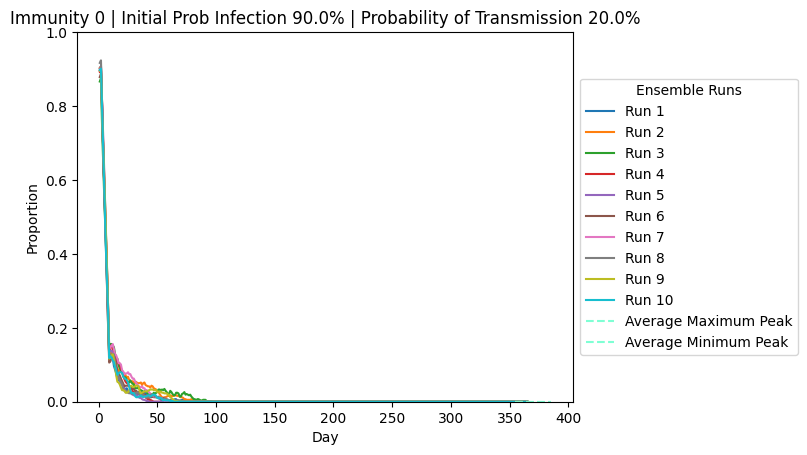

In [647]:
plot_ensemble(ensemble_runs, infection_key, 0, 0.9, 0.2, False)

#### Figure 3.2

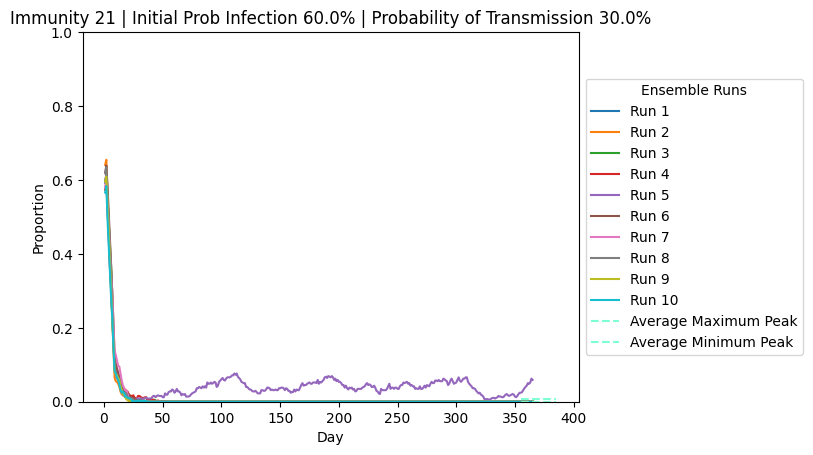

In [650]:
plot_ensemble(ensemble_runs, infection_key, 21, 0.6, 0.3, False)

#### Figure 3.3

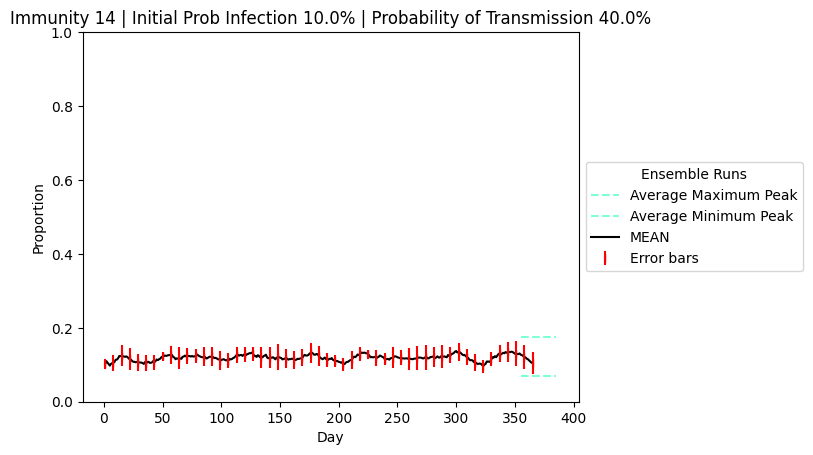

In [664]:
plot_ensemble(ensemble_runs, infection_key, 14, 0.1, 0.4, True)

#### Figure 3.4

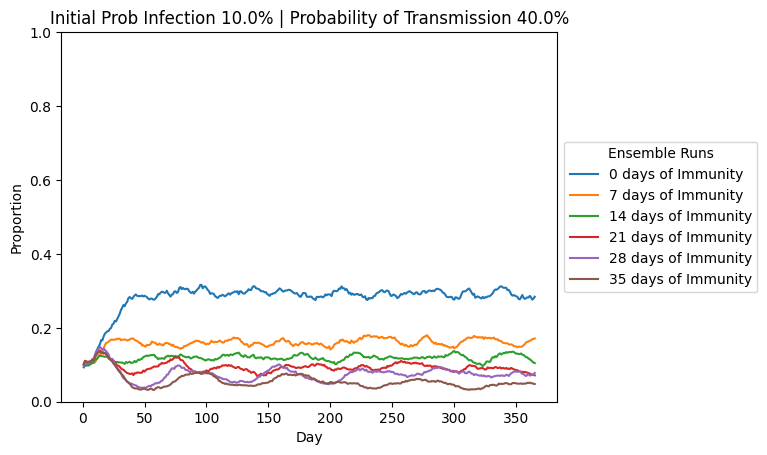

In [658]:
plot_immunity(ensemble_runs, 0.1, 0.4)

#### Figure 3.5

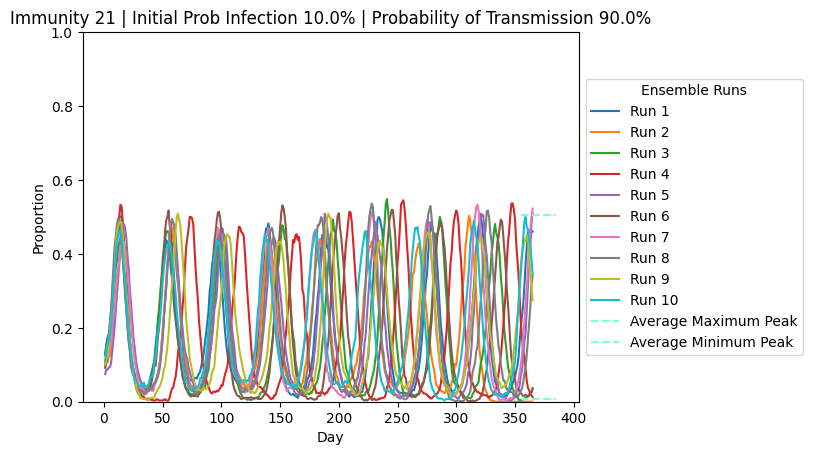

In [665]:
plot_ensemble(ensemble_runs, infection_key, 21, 0.1, 0.9, False)

#### Figure 3.6

In [666]:
# GLOBAL VARIABLES
DAYS = 365
ROWS = COLS = 25
DAYS_TO_RECOVER = 7
DAYS_WITHOUT_A_SHOP = 7
CENTER_ROW = CENTER_COL = ROWS // 2
AGITATION_MAX = 10

NATURAL_IMMUNITY = 21
INITIAL_PROBABILITY_INFECTED = 0.1
PROBABILITY_OF_TRANSMISSION = 0.9

# POWER LAW DISTRIBTUTION
x = np.arange(1, AGITATION_MAX + 1)
alpha = 4
P_LAW_DIST = np.power(x, alpha) / np.sum(np.power(x, alpha))

sim_animation()

## 4. Discussion

Across all levels of immunity and initial infection proportions, the results indicate that at transmission probabilities of 0.1 and 0.2, the disease is not sustained and eventually dies out. There is a slight outlier in this behaviour [Table 1.1], with 0 days of immunity, an initial infection proportion of 0.9, and a transmission probability of 0.2, the disease persists for roughly 90 days before declining to 0 [Figure 1.1 Run 3]. This suggests that randomness can lead to uncommon short-term behaviors, but in the long term, the system tends to align with expected outcomes. Other initial infection proportions exhibit similar behaviors in terms of their entropy values [Table 1.2]. The entropy values across a transmission probability of 0.2 and 0 days of immunity are consistent, indicating that the behaviors of the different proportions are also comparable in their expectedness.

At immunity levels of seven days or more, starting with a high initial proportion of infected individuals generally results in the infected proportion dropping to zero. This stability occurs only when the immunity period exceeds the recovery time. If all agents in the grid are initially infected, they will take at most `DAYS_TO_RECOVER` days to recover, after which natural immunity takes effect and lasts longer than the infection period of the last agent. However, not all parameter configurations followed this pattern, with an average peak infection proportion of 0.007 [Table 4.1, Initial Proportion = 0.6, Transmission Probability = 0.3]. As seen previously, randomness can create opportunities for the disease to persist without necessarily returning to a stable state [Figure 3.2, Run 5]. This persistence may be due to a low proportion of immune individuals, while the opposite, disease fading, occurs when a high proportion becomes immune. Exploring this statistic could be valuable in identifying whether there is a critical threshold of immune agents that determines whether the disease persists or dies out.

Apart from the 0 immunity level, the highest observed entropy was with a probability of transmssion of 0.4, indicating a high degree of unpredictability in the proportions [Table 2.2, 3.2, 4.2, 5.2, 6.2]. While this unpredictability could raise concerns for health professionals, the time-series plot at each immunity level reveals that it is less alarming than the entropy value suggests. The proportions do not spike to extreme levels but fluctuate in irregular patterns with minor changes [Figure 3.4]. Although the error bars indicate significant variation across runs, none suggest a worrisome increase in proportions [Figure 3.3]. The highest average peak infection proportion observed was 0.506, occurring with an immunity period of 21 days, an initial infection proportion of 0.1, and a transmission probability of 0.9 [Table 4.1]. This parameter setting results in a more orderly plot, but the range of infected agents is significantly broader [Table 4.2, Figure 3.5]. The orderly behavior produces fluctuations in waves in the proportion of infected agents, as seen in the periodic flashes of red sweeping across the grid [Figure 3.6]. This wave pattern highlights the dynamic yet structured spread of infection under these conditions. For health sector, these conditions are concerning due to the high infection peaks and wave-like outbreaks, which could overwhelm healthcare systems with recurring surges of cases. However, the predictable nature of the waves and the role of immunity provide valuable insights, allowing for better resource planning and timely interventions to mitigate the impact of the disease.

At lower immunity levels, the permutation entropy is relatively high, reflecting the chaotic and unpredictable nature of the infection. This high level of randomness is likely due to the lack of control over the spread of the infection, as the susceptible population is large and the infection dynamics are highly variable. As immunity levels increase, a corresponding decrease in permutation entropy is observed. The system becomes progressively more stable, with lower levels of randomness and unpredictability. This suggests that higher immunity levels introduce more order into the epidemic system at more parameter settings, making the disease dynamics more predictable and less prone to large fluctuations in infection rates.

Further exploration of the broader dynamics of lockdown behavior in the model could lead to valuable insights and more informative advancements. Time-series analysis plays a critical role in predicting infection patterns over extended periods. By tracking the infected population's changes daily, we can better forecast long-term trends especially with the inclusion of seasonality, including potential surges or declines based on various parameters. This predictive power offers valuable insights into future public health measures and lockdown effectiveness. 

Parameter sweeps on different grid sizes provide crucial data on how varying the density and spatial distribution of agents influences disease spread. By experimenting with different grid sizes, we can assess how population density and proximity affect infection rates, offering a clearer understanding of how space and movement constraints, similar to lockdown measures, impact viral transmission. This can offer a better simulation and understanding to represent cities/suburbs with more or less population.

Exploring randomness in recovery uncovers how the variability in recovery times affects the model’s outcomes. By introducing randomness in recovery duration, rather than a fixed homogeneous rate, the model captures more recovery patterns and investigates how unpredictability in recovery influences likelihood of new infection waves and persitence of a disease. This heterogeneity across agents may resolve the fast convergences in extreme parameter initialisations. This randomness reflects real-world disease behaviours where recovery times can vary widely across individuals.


## Bibliography
[1] Rajkumar, E., Rajan, A. M., Daniel, M., Lakshmi, R., John, R., George, A. J., Abraham, J., & Varghese, J. (2022). The psychological impact of quarantine due to COVID-19: A systematic review of risk, protective factors and interventions using socio-ecological model framework. Heliyon, 8(6), e09765. https://doi.org/10.1016/j.heliyon.2022.e09765

[2] Liu, K. Y., Costello, H., Reeves, S., & Howard, R. (2020). The Relationship Between Anxiety and Incident Agitation in Alzheimer’s Disease. Journal of Alzheimer’s Disease, 78(3), 1119–1127. https://doi.org/10.3233/jad-200516

‌[3] Nguyen, L. (2023, August 4). “Simulation 102: Agent-Based Disease Modeling”. Medium. https://medium.com/@ln8378/simulation-102-agent-based-disease-modeling-17307f2de2f3

[4] Hunter, E., Namee, B., & Kelleher, J. (2018). “A Comparison of Agent-Based Models and Equation Based”. ARROW@TU Dublin. https://doi.org/10.21427/rtq2-hs52

[5] Anderson, R. M., & May, R. M. (1985). “Age-related changes in the rate of disease transmission: implications for the design of vaccination programmes”. Epidemiology & Infection, 94(3), 365–436. https://doi.org/10.1017/S002217240006160X

[6] Milne, G. J., Xie, S., Poklepovich, D., O’Halloran, D., Yap, M., & Whyatt, D. (2021). A modelling analysis of the effectiveness of second wave COVID-19 response strategies in Australia. Scientific Reports, 11(1). https://doi.org/10.1038/s41598-021-91418-6
‌

[7] Stobart, A., & Duckett, S. (2021). Australia’s Response to COVID-19. Health Economics, Policy and Law, 17(1), 1–29. https://doi.org/10.1017/s1744133121000244

[8] Press, A. A. (2021, August 22). Police say Melbourne anti-lockdown protest “most violent in nearly 20 years.” The Guardian. https://www.theguardian.com/australia-news/2021/aug/22/police-say-melbourne-anti-lockdown-protest-most-violent-in-nearly-20-years

‌[9] Australia: grocery shopping frequency 2023. (n.d.). Statista. https://www.statista.com/statistics/1379099/australia-grocery-shopping-frequency/

[10] I herd you. (2018, August 6). I herd you! Complexity-Explorables.org. https://www.complexity-explorables.org/explorables/i-herd-you/
